In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings

## OBJECTIVE

- Performing EDA of Current Data.
- Finding insights from Data, such as relationship between features.
- Visualizing the portion of feature.

### Load Data Set

In [2]:
df = pd.read_csv("dataset HR analytics.csv")

### Drop unnecessary column

In [3]:
df.drop(['Employee_Name','EmpID', 'MarriedID'], axis =1 , inplace=True)

- We will drop unnecessary column to be used in further analysis, Emp_Name and EmpID is just ID and Name, we cant gain information from it.
- And MarriedID is similar to MaritalStatusID, so we just use MaritalStatusID for doing analysis.

### Data Type each Column  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MaritalStatusID             287 non-null    object 
 1   GenderID                    287 non-null    object 
 2   EmpStatusID                 287 non-null    object 
 3   RoleID                      287 non-null    object 
 4   LevelID                     287 non-null    object 
 5   PerfScoreID                 287 non-null    object 
 6   Tribe                       287 non-null    object 
 7   Squad                       287 non-null    object 
 8   DOB                         287 non-null    object 
 9   RaceDesc                    287 non-null    object 
 10  DateofHire                  287 non-null    object 
 11  DateofTermination           93 non-null     object 
 12  TermReason                  287 non-null    object 
 13  EmploymentStatus            287 non

- As we see the Date is still object type, we will convert data type of Date with datetime first.
- We will convert DOB, DateofHire, DateofTermination

## << PreProcessing Section >>

### DateofHire and DateofTermination Columns transformation

- We will convert this 2 columns into date and then we will use to calculate into duration of work.
- We will make an assumption the duration of employee who still work in the company until July 16, 2021.

In [5]:
today_assumsion = dt.strptime('16-07-2021','%d-%m-%Y')

In [6]:
df['DateofHire'] = pd.to_datetime(df.DateofHire)
df['DateofTermination'] = pd.to_datetime(df.DateofTermination)

In [7]:
def duration(date, terminate, option = 'Y'):
    if str(terminate) == 'NaT':
        days = today_assumsion - date
    else:
        days = terminate - date
    
    result = np.timedelta64(days, 'ns').astype(f'timedelta64[{option}]')/np.timedelta64(1, f'{option}')
    
    return result

In [8]:
df['YearsOfWorking'] = df.apply(lambda x : duration(x['DateofHire'], x['DateofTermination']), axis=1)

### DOB Column transformation

- We will convert this column into age.
- Same as before we will make an assumption that the age of employee who still work in the company until July 16, 2021.
- For Resigned Employee, we will calculate until their termination date.

In [9]:
def age(dob, terminate):
    check_date = len(dob)- dob.rfind('/')
    if check_date == 3:
        date = list(dob)
        date.insert(6, '19')
        dob = ''.join(date)
    
    date_dob = pd.to_datetime(dob)
    
    if str(terminate) == 'NaT':
        days = today_assumsion - date_dob
    else:
        days = terminate - date_dob
    
    year = np.timedelta64(days, 'ns').astype('timedelta64[Y]')/np.timedelta64(1, 'Y')
    
    return year

In [10]:
df['Age'] = df.apply(lambda x : age(x['DOB'], x['DateofTermination']), axis=1)

### LastPerformanceReview_Date Column transformation

- we will convert this column into a number of day
- Same as before we will make an assumption that the day from last perfomance review of employee who still work in the company until July 16, 2021.
- For Resigned Employee, we will calculate until their termination date.

In [11]:
df['LastPerformanceReview_Date'] = pd.to_datetime(df.LastPerformanceReview_Date)

In [12]:
df['DaysLastReview'] = df.apply(lambda x : duration(x['LastPerformanceReview_Date'], x['DateofTermination'], option='D'), axis=1)

### Add Column ActiveStatus

- We will add another column just to group the employee, 1 is Active and 0 is for Voluntarily Terminated and Terminated for Cause 

In [13]:
df['ActiveStatus'] = df.EmploymentStatus.map({'Active' : 'Yes', 'Voluntarily Terminated': 'No', 
                                              'Terminated for Cause': 'No'})

### Reselecting Feature

- Now we will reselect the necessary features to do EDA process.

In [14]:
df.drop(['DateofHire', 'DateofTermination', 'DOB', 'LastPerformanceReview_Date'], axis =1, inplace=True)
df.shape

(287, 21)

- Since we already calculated the age and the working duration, so we dont need those 4 columns.

### Check the Missing Values

In [15]:
df.isnull().sum()

MaritalStatusID         0
GenderID                0
EmpStatusID             0
RoleID                  0
LevelID                 0
PerfScoreID             0
Tribe                   0
Squad                   0
RaceDesc                0
TermReason              0
EmploymentStatus        0
RecruitmentSource       0
EngagementSurvey        0
EmpSatisfaction         0
SpecialProjectsCount    0
DaysLateLast30          0
Absences                0
YearsOfWorking          0
Age                     0
DaysLastReview          0
ActiveStatus            0
dtype: int64

- Right now, we dont have any missing value in our data.
- And then our data is already transformed before doing further analysis.

## << EDA Section >>

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude =['object']).columns

In [17]:
print(categorical_columns)
print(numerical_columns)

Index(['MaritalStatusID', 'GenderID', 'EmpStatusID', 'RoleID', 'LevelID',
       'PerfScoreID', 'Tribe', 'Squad', 'RaceDesc', 'TermReason',
       'EmploymentStatus', 'RecruitmentSource', 'ActiveStatus'],
      dtype='object')
Index(['EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'YearsOfWorking', 'Age',
       'DaysLastReview'],
      dtype='object')


- We will devide this section into 2 part :
    - Part 1, Categorical - Categorical Features.
    - Part 2, Numerical - Categorical Features.

### 1. Categorical - Categorical Feature

- In this section we will try to find some informations regarding our categorical feature.
- And find relation between them using some methods.

#### 1.1 Categorical Portion each Feature

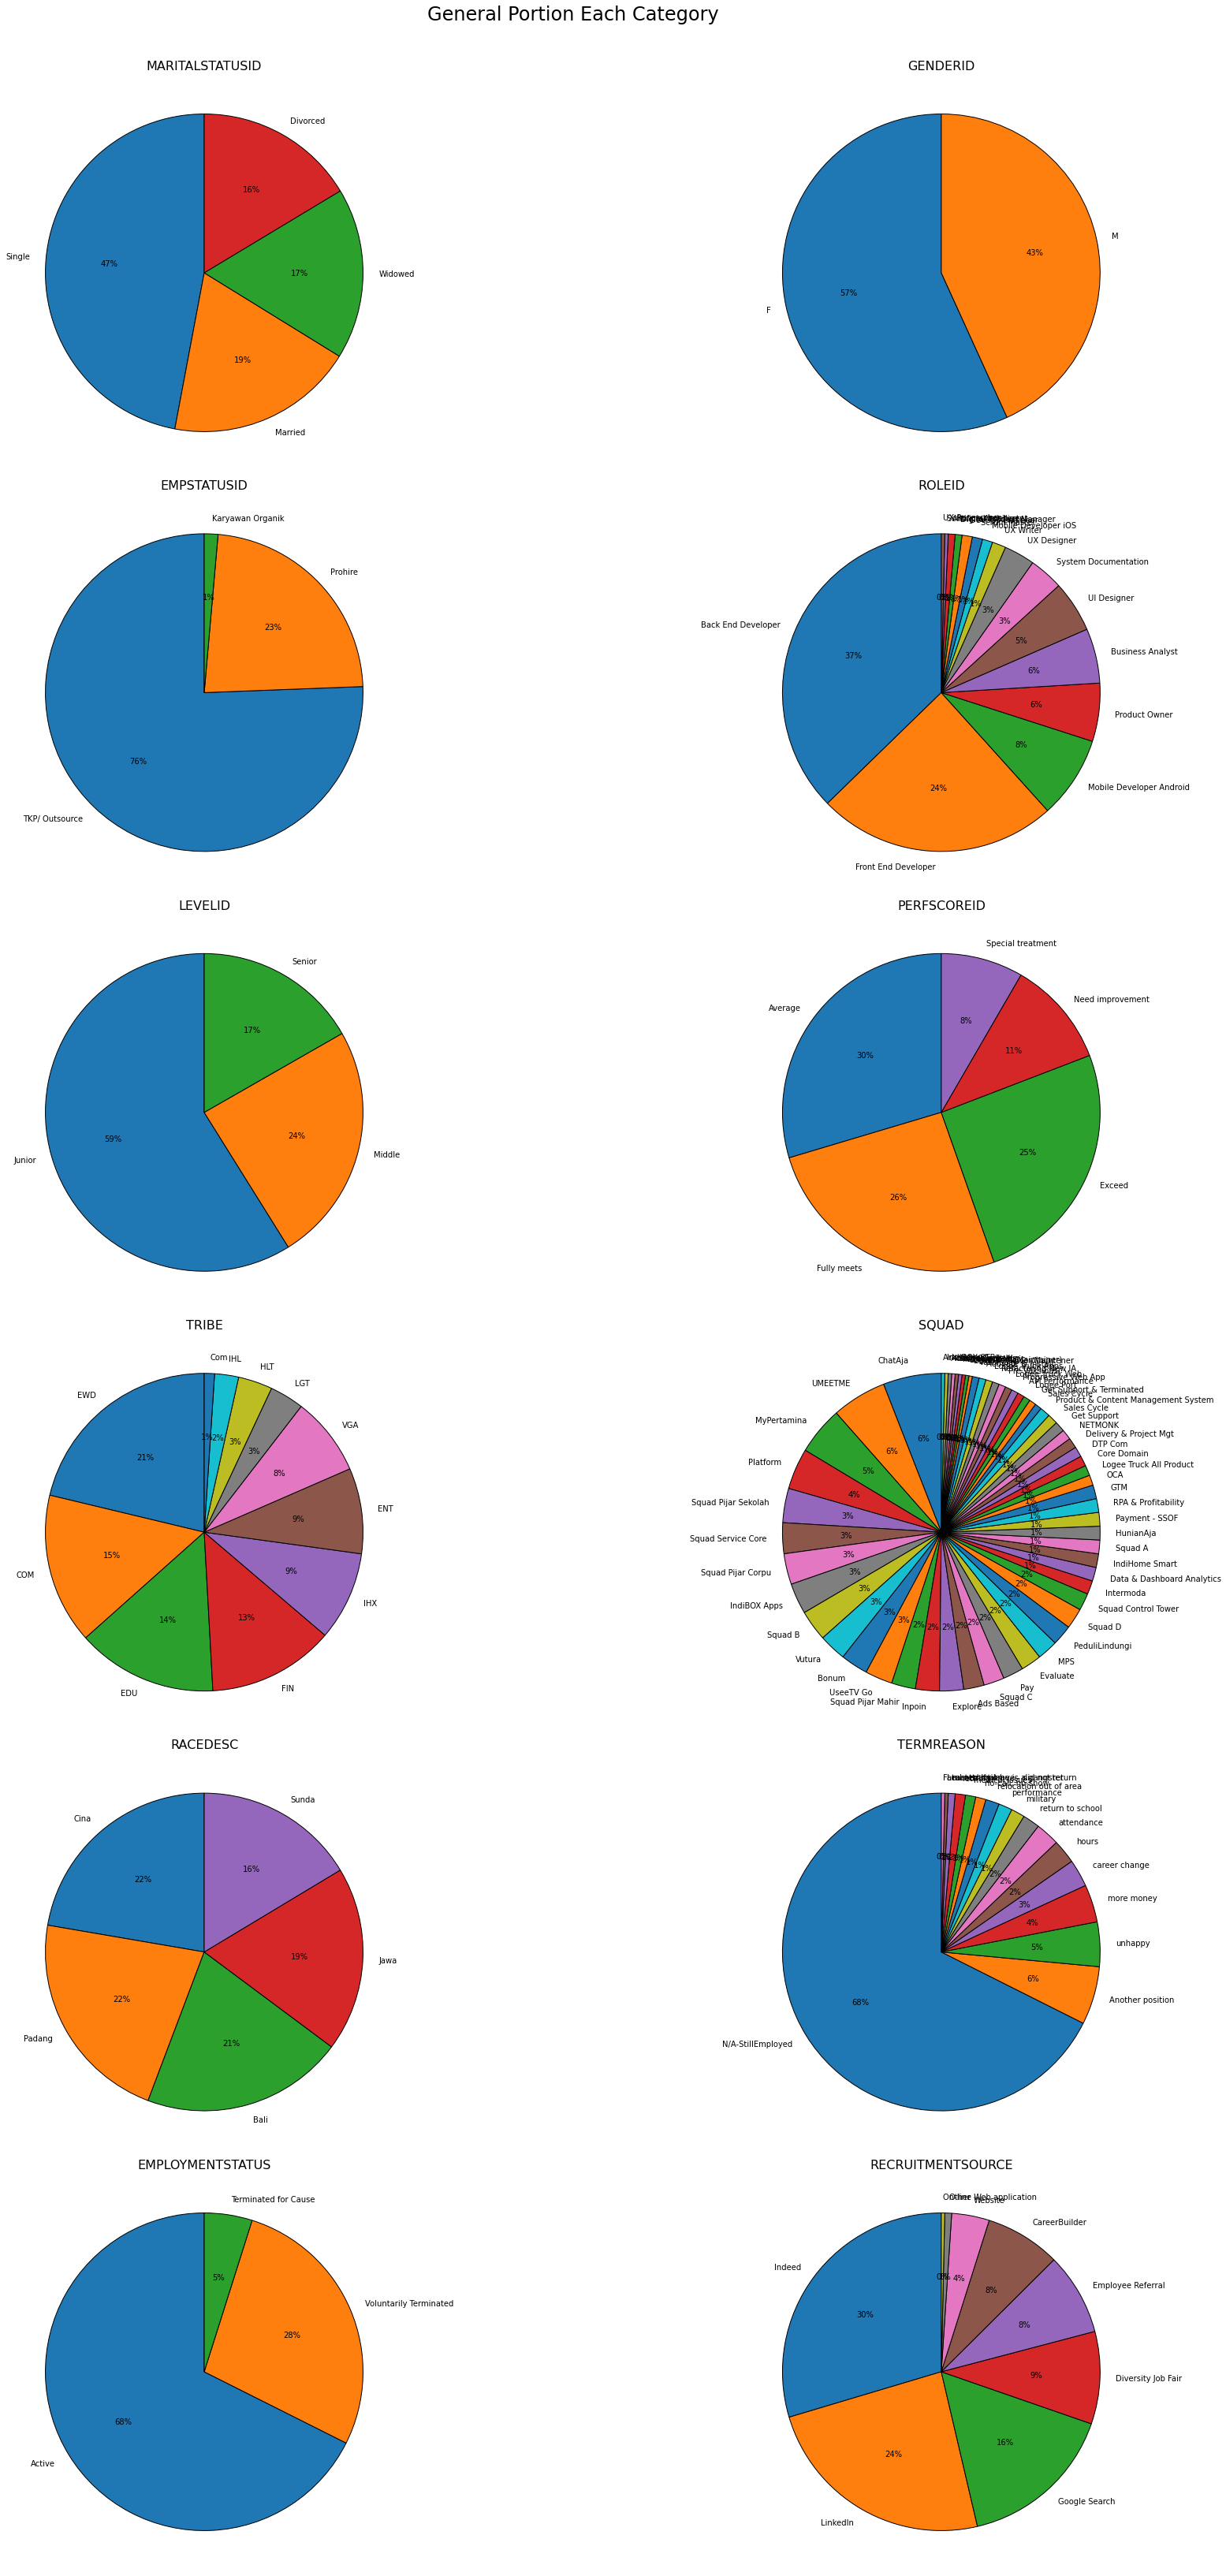

In [18]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

fig, axs = plt.subplots(6, 2, figsize=(30, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.2)
axs = axs.ravel()

for index, col in enumerate(categorical_columns[:-1]):
    df[col].value_counts().plot.pie(autopct = "%1.0f%%", startangle=90 
                                    ,shadow = False, ax=axs[index],fontsize=10, 
                                    wedgeprops={"linewidth":1,"edgecolor":"k"})
    axs[index].set_title(col.upper(),fontsize=16)
    axs[index].set_ylabel('')
    
# axs.flat[-1].set_visible(False)
fig.suptitle('General Portion Each Category', va='bottom', fontsize =24, y=1)
fig.tight_layout()

- From all graph above, we can see the portion of each categorical feature. 
- We are interested in major portion of each feature, for Marital the major portion is Single, and Gender is Female, for empstatus 76% is Outsource, Role is Backend developer followed by Frontend, for Level is Junior.
- And the other feature, like Squad, Race, Tribe, Perfomance Score, the portion of each value is quite similar.
- as We know Employment status, and Term reason are related each other because 68% is active, so value Stillemployed is also 68%.
- 3 largest values from Recruitment are Indeed, Linkedin, Google Search

#### 1.2 Categorical Vs ActiveStatus

- We will separate Squad, TermReason, EmploymentStatus, because for Squad it has a lot of unique value, we will plot separately, it will make the plot unclear. And for TermReason and EmploymentStatus, its unnecessary to be visualized because in below graph we will plot graph with respect to ActiveStatus, as we know these 2 columns are related to activestatus column.

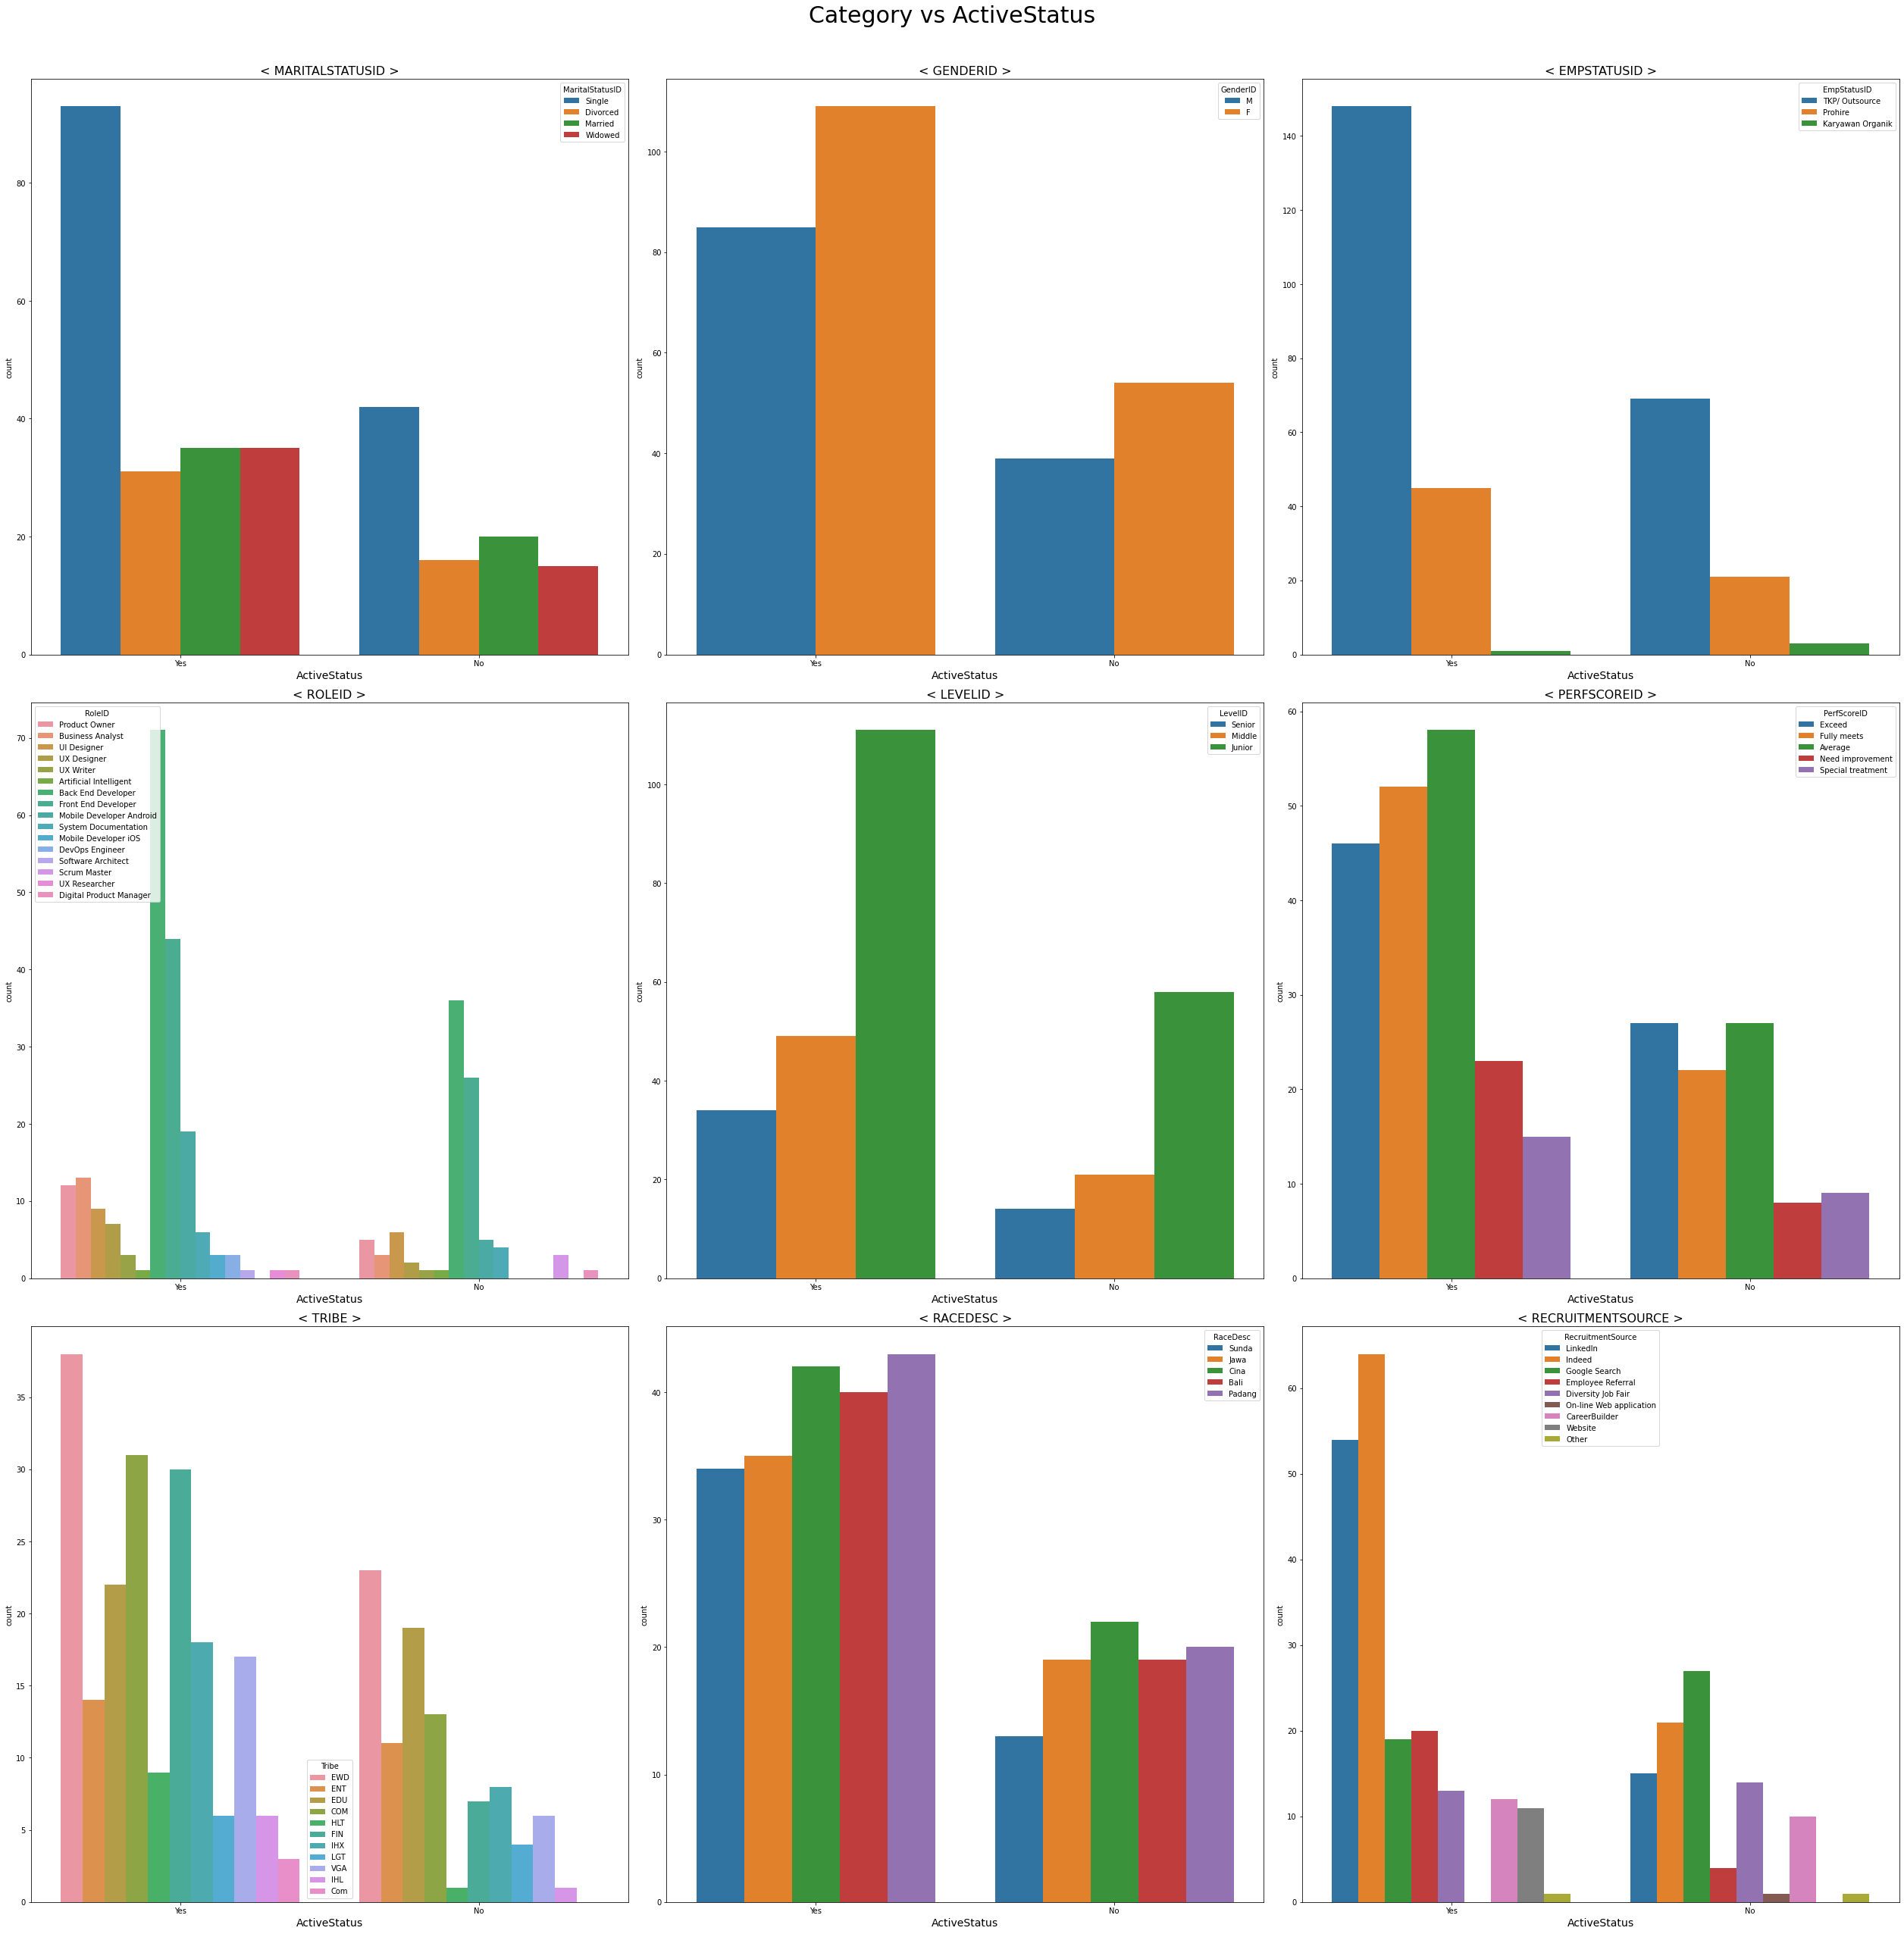

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(35, 35), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()

categorical_columns2 = list(categorical_columns).copy()
categorical_columns2.remove('ActiveStatus')
categorical_columns2.remove('Squad')
categorical_columns2.remove('TermReason')
categorical_columns2.remove('EmploymentStatus')

for index, col in enumerate(categorical_columns2):
    sns.countplot(x='ActiveStatus', hue=col, data=df, ax=axs[index])
    axs[index].set_title(f'< {col.upper()} >',fontsize=16)
    axs[index].set_xlabel('ActiveStatus', fontsize=14)

fig.suptitle('Category vs ActiveStatus', va='bottom', fontsize=30, y= 1)
fig.tight_layout()

- From graph above we can see the categorical feature with respect to ActiveStatus.
- We would like to know about which value that has bigger portion on ActiveStatus either Yes or No ;
    - For Gender, Marital, EmpStatus, Level, Role feature. Single, female, Outsource, Junior, Backend is bigger portion both in Yes or No. its not suprising since the biggest portion that we can see in the previous graph are from them also.
    - PerfScore is quite interesting, because Exceed and Average is the highest number, we can infer that people who leave the company tend to have a good perfomance score.
    - For Tribe, people who are from EWD has the highest number of leaving the company.
    - For Race, the distribution is almost similar along each value.
    - Recruitment Source, it tells us, google search has significant valu for number of leaving the company.

##### 1.2.1 Squad Plot vs ActiveStatus

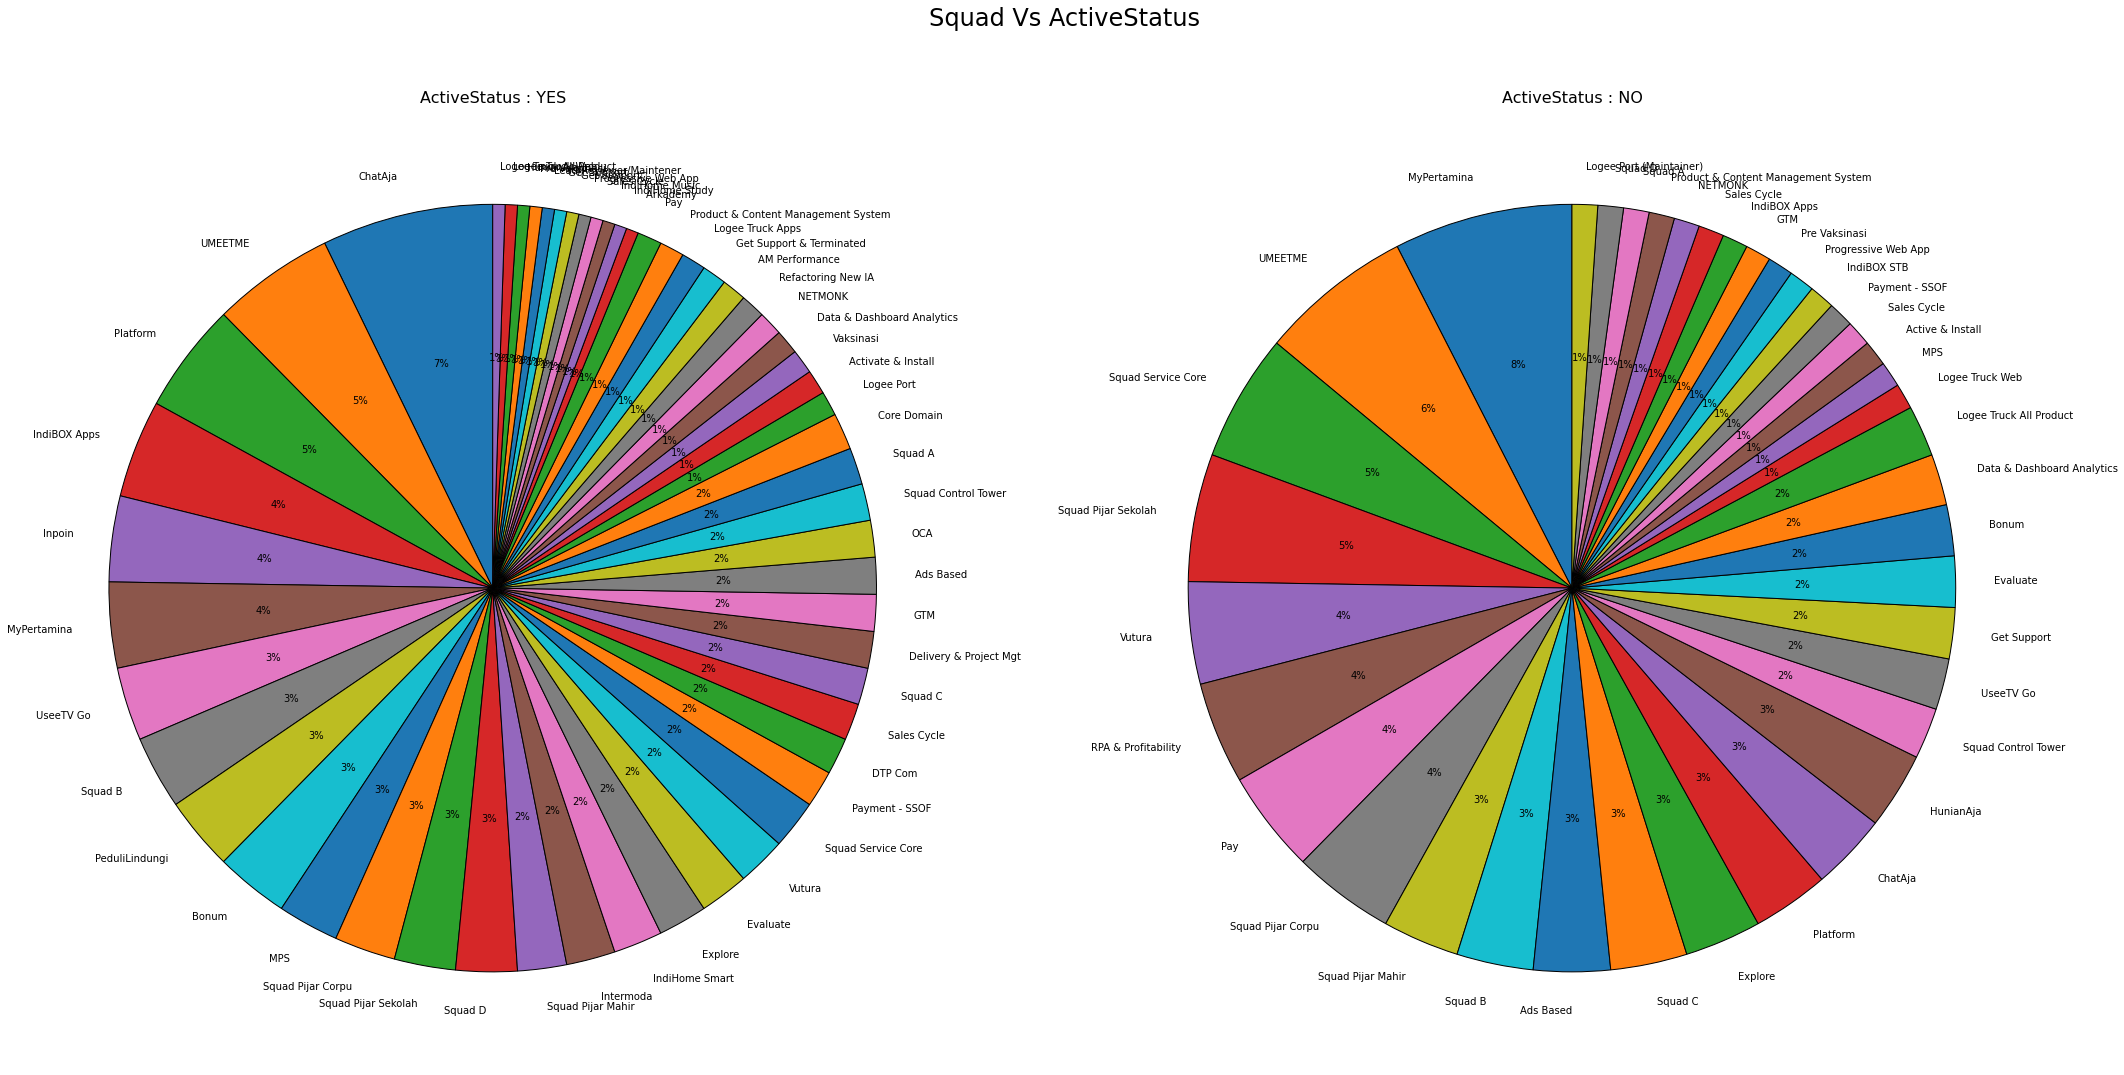

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(30, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.2)
axs = axs.ravel()

for index, col in enumerate(['Yes', 'No']):
    df['Squad'][df.ActiveStatus == col].value_counts().plot.pie(autopct = "%1.0f%%", startangle=90 
                                    ,shadow = False, ax=axs[index],fontsize=10, 
                                    wedgeprops={"linewidth":1,"edgecolor":"k"})
    axs[index].set_title('ActiveStatus : '+col.upper(),fontsize=16)
    axs[index].set_ylabel('')
    
fig.suptitle('Squad Vs ActiveStatus', va='bottom', fontsize =24, y=1)
fig.tight_layout()

- From Squad we can see ChatAja has the highest value of YES class, and for the NO class MyPertamina is the highest, but as we see the portion is so small, there is no significant portion along each value.

#### 1.3 Categorical vs "No" ActiveStatus

- Since we want to know about the person who has left the company or not, so we will look more detail into No class, and we will analyze which factor has bigger effect.
- We can know that by seeing a pareto chart below.
- Since there is no pareto chart in builtin function, so we make our own pareto chart function.

In [21]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}', clr_dict=None):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(30,17))
    barplot = sns.barplot(data= df, x=x, y=y, ax=ax1, palette=clr_dict)
    ax1.set_ylabel('Total Cases')
    ax1.tick_params(labelrotation=90)

    ax2 = ax1.twinx()

    ax2.plot(x, cumsum, '-ro', alpha=0.5)
        
    ax2.set_ylabel('Cumulative Percentage', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = [i/10 for i in range(0, 11)]
    ax2.set_yticks(vals)
    ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]

    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]-0.05), fontweight='heavy' )
        barplot.text(i, y[i], str(round(weights[i]*100,1))+'%', color='black', ha="center", va='bottom')
    
    if title:
        plt.title(title)
    
    plt.show()

In [22]:
df_pareto = pd.DataFrame(columns=['Parameter', 'Value'])

In [23]:
categorical_columns2

['MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'RoleID',
 'LevelID',
 'PerfScoreID',
 'Tribe',
 'RaceDesc',
 'RecruitmentSource']

In [24]:
for item in categorical_columns2 :
    temp = df.groupby([item,'ActiveStatus']).count()['Age'].reset_index()
    temp = temp[temp.ActiveStatus == 'No'][[item, 'Age' ]].rename(columns = {item: 'Parameter',
                                                                                'Age' : 'Value'})
    temp['Parameter'] = item + '-' + temp['Parameter']
    
    df_pareto = df_pareto.append(temp, ignore_index=True)

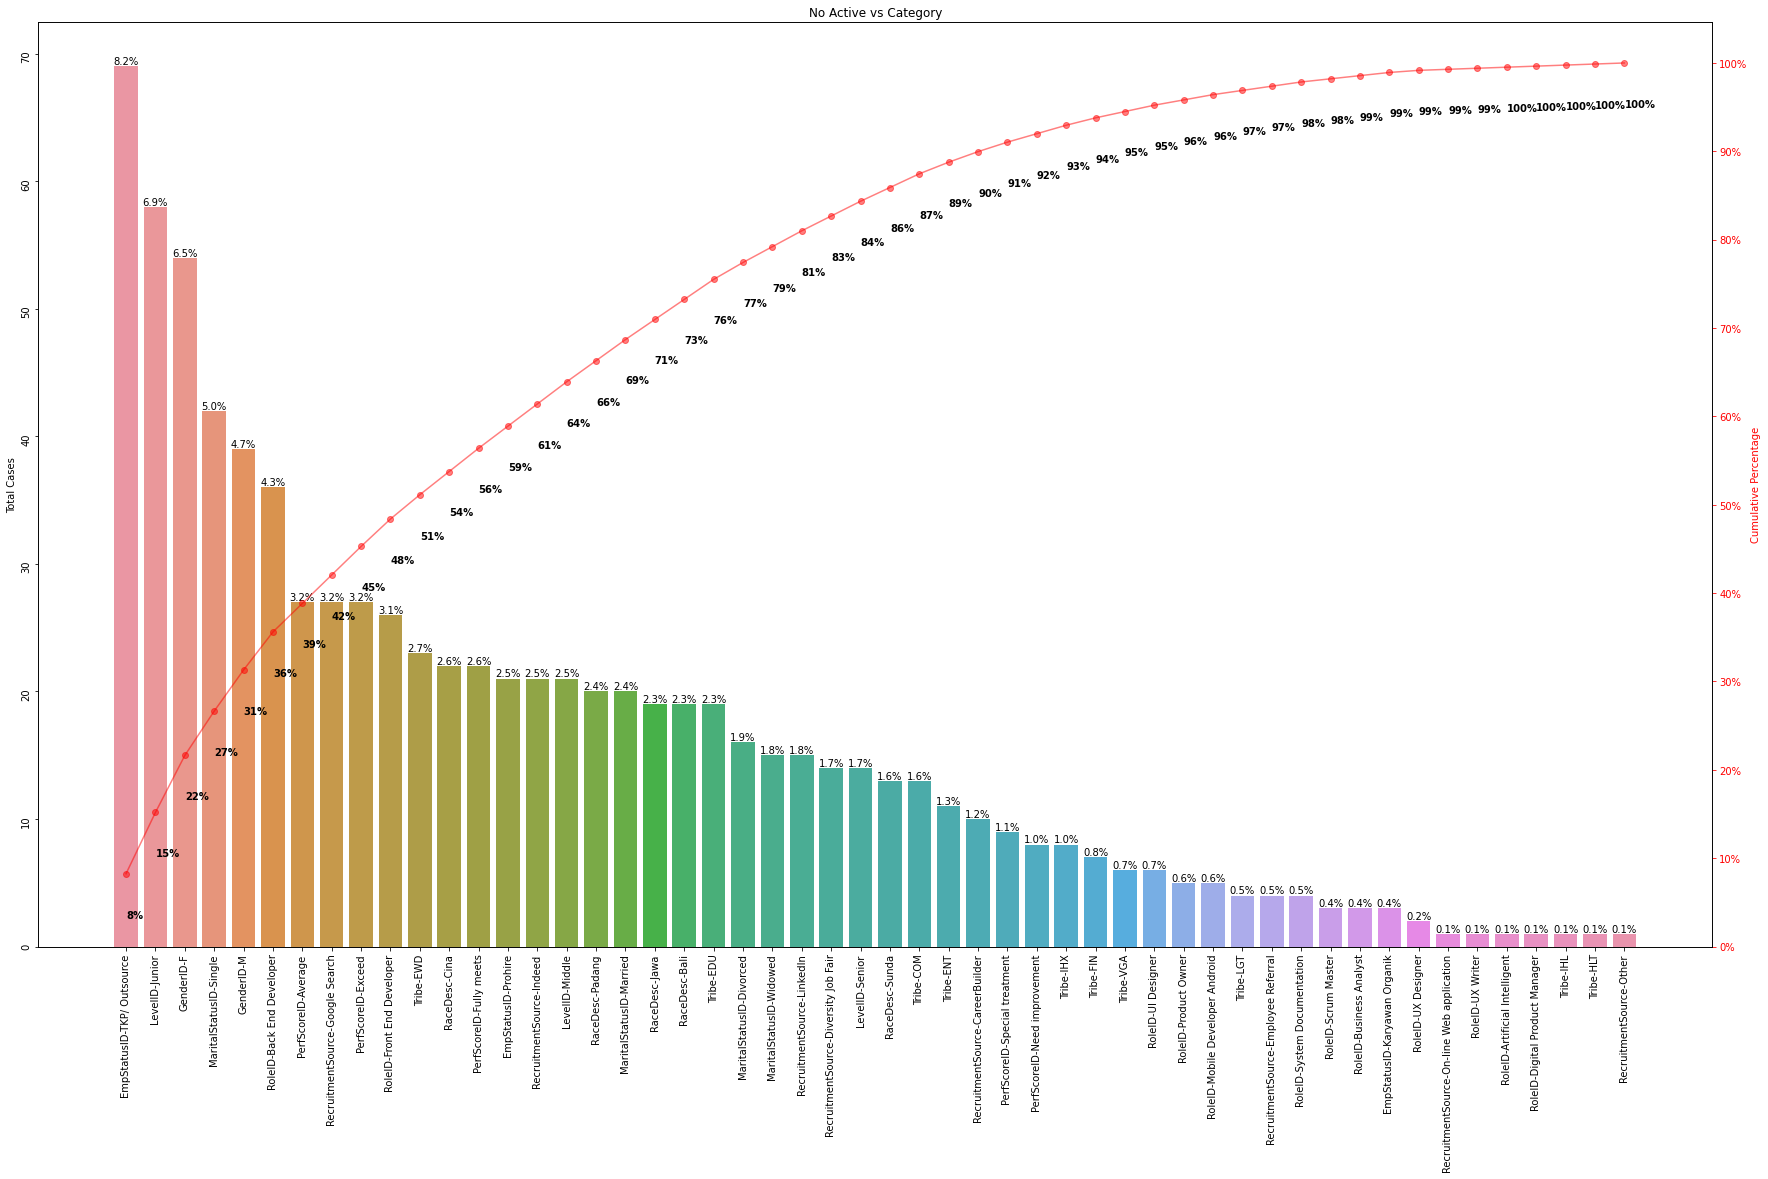

In [25]:
title_no = 'No Active vs Category'
pareto_plot(df = df_pareto, x='Parameter', y = 'Value', title= title_no, show_pct_y=True)

- From pareto chart above tells us, the portion of each categorical value. 
- EmpStatus - Outsource, Level-Junior, Gender-Female, Marital-Single, Gender-Male, and Role-Backend are the top 6 those have higher portion. And for the others have small portion.
- And we will do the statistical testing and association method to check the relation between these categorical features.

#### 1.4 Relation between Categorical Features

- In order to see the relationship between variable, we will try these approaches ;
    - We will plot the association between them.
    - And also we will do statiscal test, Chi-Sq Test, to check with hypotesis testing.
- Since this is not Continous variable, we will try to find the assosiation with another approach, in my opinion this is a more appropriate way instead of using a Correlation method.
- Association is similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
- You can find out on this good articel as my reference
<a>https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9</a>

In [26]:
from dython.nominal import associations

In [27]:
categorical_columns3 = categorical_columns2.copy()
categorical_columns3.append('Squad')
categorical_columns3.append('ActiveStatus')

#### 1.4.1 Association between Feature using CramerV

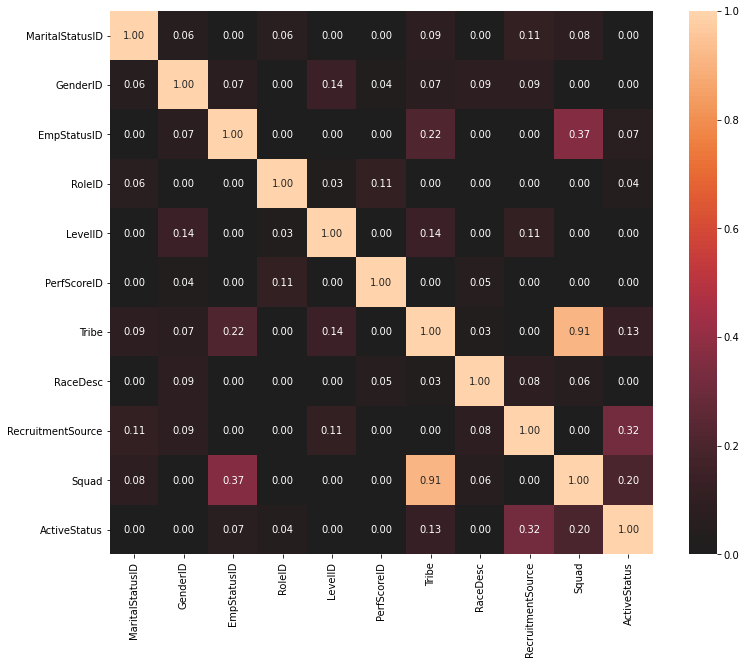

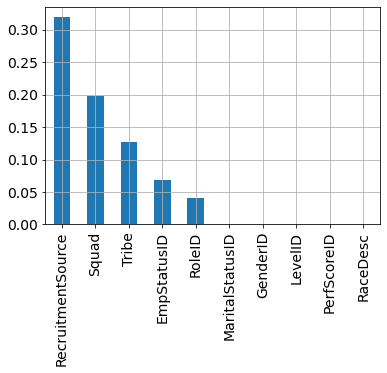

In [28]:
plot_asso = associations(dataset=df[categorical_columns3], nom_nom_assoc='cramer', nominal_columns='all', figsize=(13,10))
plot_asso['corr']['ActiveStatus'].sort_values(ascending=False)[1:].plot.bar(fontsize = 14, rot = 90, grid = True)
plt.show()

- From Matrix association above, we can see almost each category has very small value that associates with ActiveStatus, less than 0.2.
- Only RecruitmentSource that has higher value, but still not significant value, its only 0.31.
- And also the matrix tells us about, there is strong association between Tribe and Squad, 0.91, its very strong value, its not suprising as we know Squad is part of the Tribe. So we will only use one of them.
- We will check again with hypotesis testing in the following section.

#### 1.4.2  Hypotesis testing using Chi-Sq

- First, We start by defining as below;
    - The Null hypothesis (H0) which states that there is no relation between the variables. 
    - An alternate hypothesis (H1) would state that there is a significant relation between the two.
- Then we will check the p_value, we set alpha with 5%. If p_value below our alpha, then we reject the null hypotesis, it means we are accepting the Alternate Hypotesis.
- We will test with Chi-Square Test for Categorical Variable.

In [29]:
from scipy.stats import chi2_contingency

In [30]:
# chi-squared test with similar proportions
alpha = 0.05
chisq_accept = []
chisq_reject = []
for feature in categorical_columns3:
    if feature != 'ActiveStatus':
        contigency = pd.crosstab(df[feature], df['ActiveStatus']) 
        stat, p, dof, expected = chi2_contingency(contigency)
        if p <= alpha:
            #('There is relation (reject H0)')
            chisq_reject.append(feature)
        else:
            #('There is no relation (fail to reject H0)')
            chisq_accept.append(feature)

In [31]:
print('ChiSq Group Accepting null Hypotesis : ', chisq_accept, sep='\n')
print('---------------------------------------------------------------')
print('ChiSq Group Rejecting null Hypotesis : ', chisq_reject, sep='\n')

ChiSq Group Accepting null Hypotesis : 
['MaritalStatusID', 'GenderID', 'EmpStatusID', 'RoleID', 'LevelID', 'PerfScoreID', 'Tribe', 'RaceDesc', 'Squad']
---------------------------------------------------------------
ChiSq Group Rejecting null Hypotesis : 
['RecruitmentSource']


- Based on hypotesis testing we can get the information which variable has the significant relation. 
- The result shows us, the first group (Accepting Null Hypotesis) has no significant relation, this statement is supported by Association value in the prev graph.
- Otherwise, the second group (Rejecting Null Hypotesis) have higher asssociation value than the first group, by looking in the previous graph, in this case RecruitmentSource. 
- In general we can conclude that our hypotesis testing is supported by our cramerV method.

### 2. Numerical - Categorical Feature

- In this section, first we will try analyze numerical - numerical feature.
- Then, we will try to find some informations regarding our numerical feature with respect to our ActiveStatus(categorical)
- We will look more detail about relationship between these categories using hypotesis testing and correlation ration.
- In addition, we will put PerfScoreID and LevelID into this analysis, because as we know this category is an ordinal type.

In [32]:
dict_level = dict(zip(df.LevelID.unique(), [3,2,1]))
dict_level

{'Senior': 3, 'Middle': 2, 'Junior': 1}

In [33]:
dict_perfscore = dict(zip(df.PerfScoreID.unique(), [5,4,3,2,1]))
dict_perfscore

{'Exceed': 5,
 'Fully meets': 4,
 'Average': 3,
 'Need improvement': 2,
 'Special treatment': 1}

- First, we will translate the value in PerfScoreID into a number, by assigning 5 for Exceed and 1 for Special treament, as We know this is ordinal, where Exceed > Fully meets and so on. And also Senior > Middle etc.

In [34]:
df['PerfValue'] = df['PerfScoreID'].map(dict_perfscore)

In [35]:
df['LevelValue'] = df['LevelID'].map(dict_level)

#### 2.1 Distribution Each Category

- In this section we will plot the distribution of each feature.
- And also, we will test with normality test, to check whether the distribution is normal
- First, We define hypotesis as below;
    - The Null hypothesis (H0) which states that the distribution comes from normal distribution. 
    - An alternate hypothesis (H1) would state that the distribution comes from not normal distribution.

In [36]:
from scipy.stats import normaltest

In [37]:
numerical_columns2 = list(numerical_columns).copy()
numerical_columns2.append('PerfValue')
numerical_columns2.append('LevelValue')

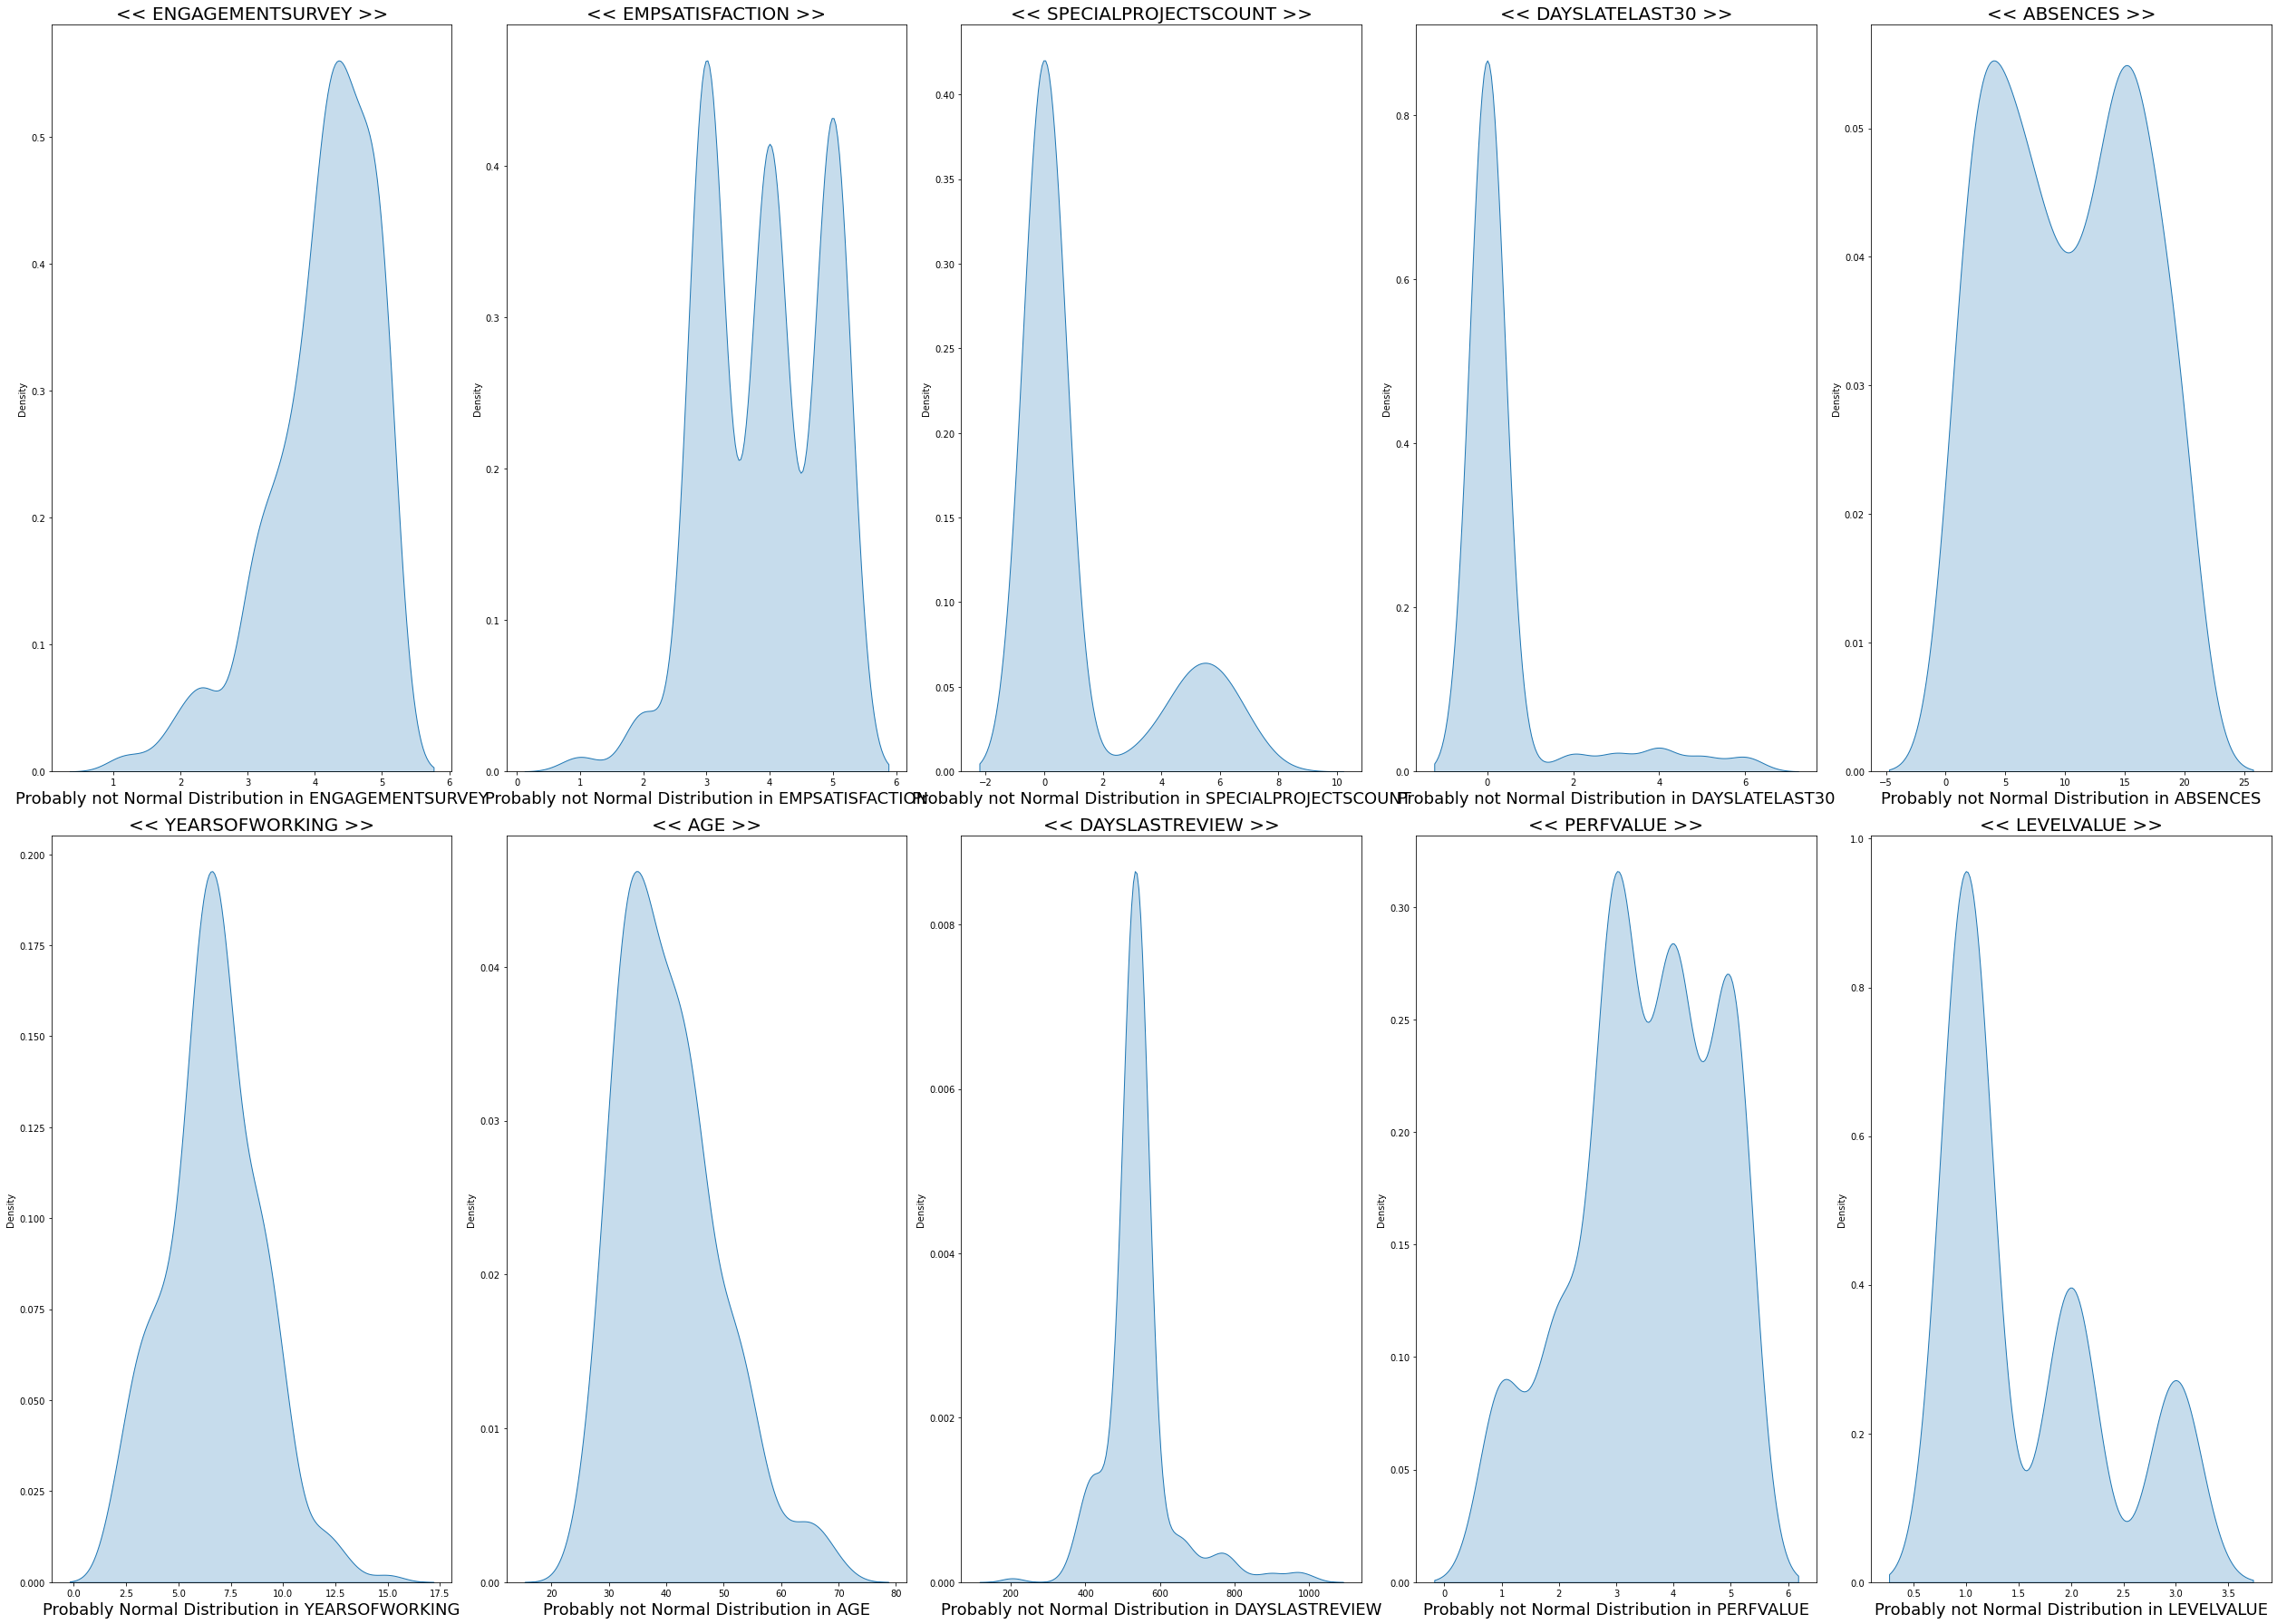

In [38]:
alpha = 0.05
fig, axs = plt.subplots(2, 5, figsize=(35, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()
reject_null = []
accept_null = []

for index, col in enumerate(numerical_columns2):
    kde_plot = sns.kdeplot(data=df, x=col, ax=axs[index], fill=True, common_norm= True)
    axs[index].set_title(f'< {col.upper()} >',fontsize=16)

    data = df[col].values
    stat, pval = normaltest(data)
    if pval < alpha:
        reject_null.append(col)
        text = f"Probably not Normal Distribution in {col.upper()}"
    else:
        accept_null.append(col)
        text = f"Probably Normal Distribution in {col.upper()}"
        
    axs[index].set_title(f'<< {col.upper()} >>', fontsize=20)
    axs[index].set_xlabel(f"{text}", fontsize=18)

fig.tight_layout()

In [39]:
print('Normality Group Accepting null Hypotesis : ', accept_null, sep='\n')
print('---------------------------------------------------------------')
print('Normality Group Rejecting null Hypotesis : ', reject_null, sep='\n')

Normality Group Accepting null Hypotesis : 
['YearsOfWorking']
---------------------------------------------------------------
Normality Group Rejecting null Hypotesis : 
['EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Age', 'DaysLastReview', 'PerfValue', 'LevelValue']


- From normality test, we can get informations that, Only Yearsofworking is coming from Normal Distribution.
- And for the others, they look like not coming from Normal Distribution.
- We will check this distribution with respect to ActiveStatus also in the next section.

#### 2.2 Check the Outlier Value each Feature

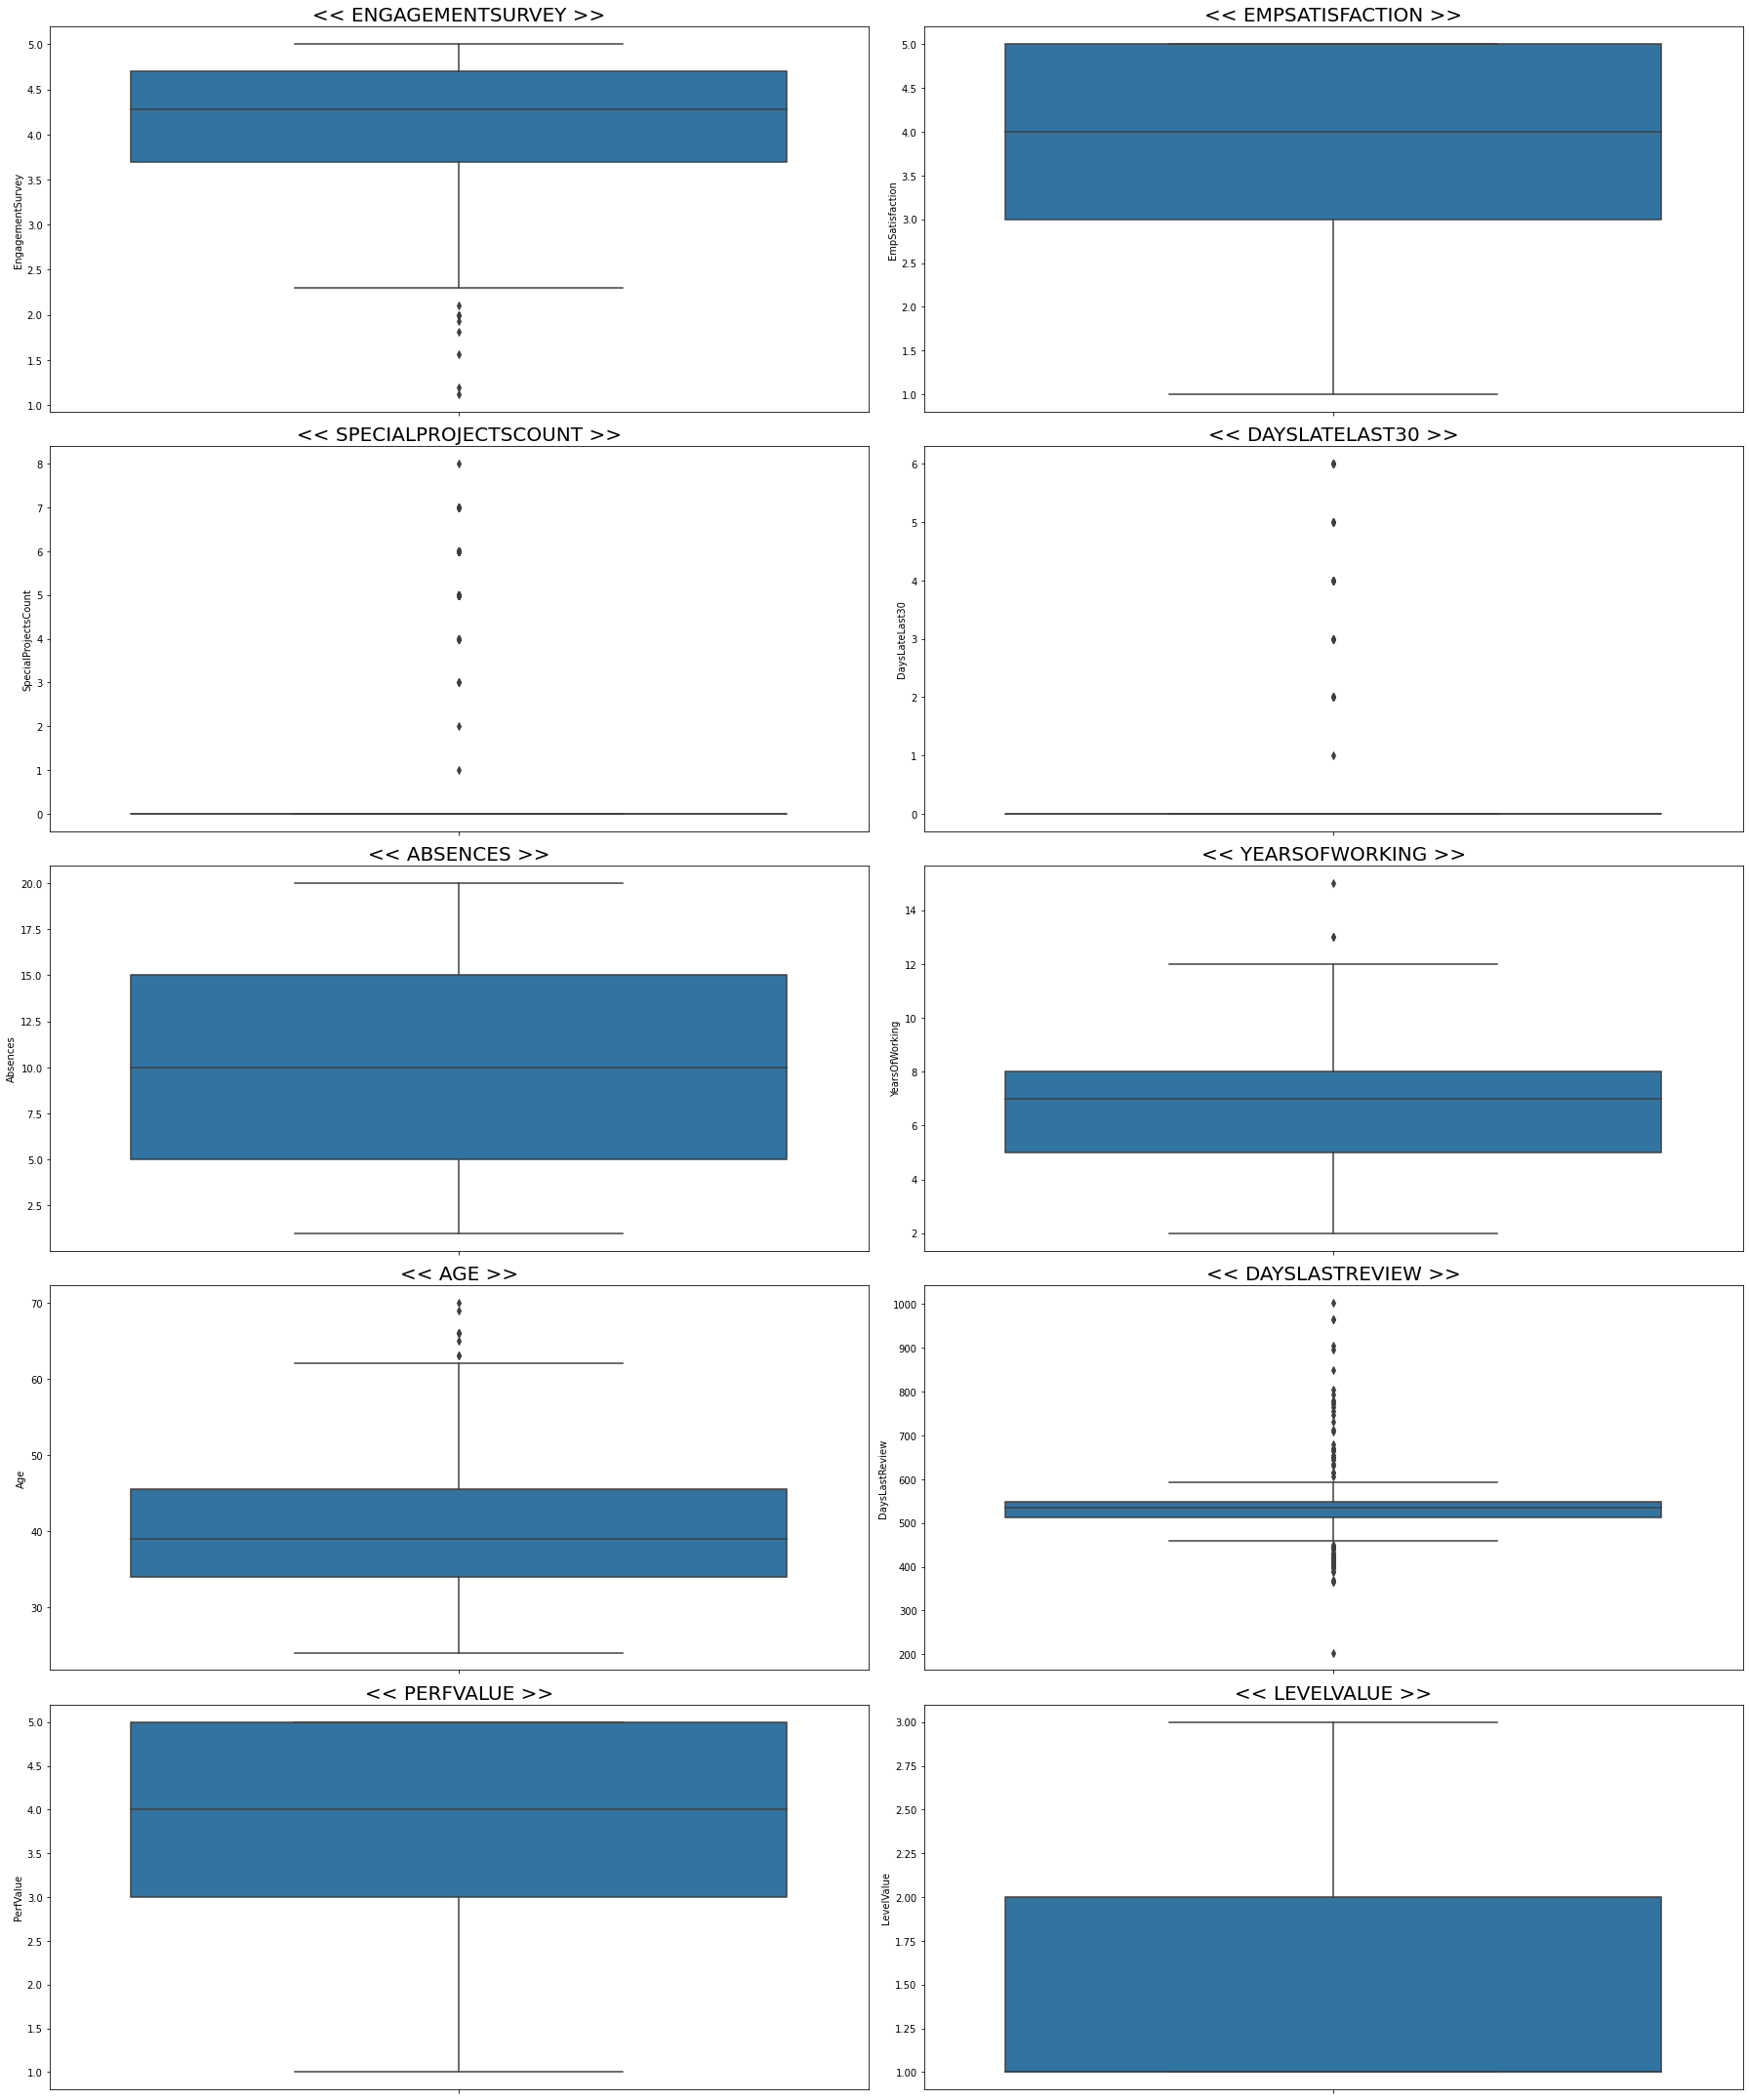

In [40]:
fig, axs = plt.subplots(5, 2, figsize=(25, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()

for index, col in enumerate(numerical_columns2):
    sns.boxplot(data=df, y=col, ax=axs[index], orient='v')     
    axs[index].set_title(f'<< {col.upper()} >>', fontsize=20)
    
fig.tight_layout()

- With boxplot we can see clearer outlier in our data, some features have a lot of outlier. its not suprising since our normality test tells us most of our feature is not normal distribution.
- Dayslastreview has the highest number of outlier.
- And also we see Age has right skew distribution, with some values above top whisker.
- Otherwise, Engagementsurvey has left skew distribution, some values below top whisker.
- For PerfomanceValue and Empsatisfaction, most of the value rely on 3-5 Score

#### 2.3 Correlation between Numerical Feature

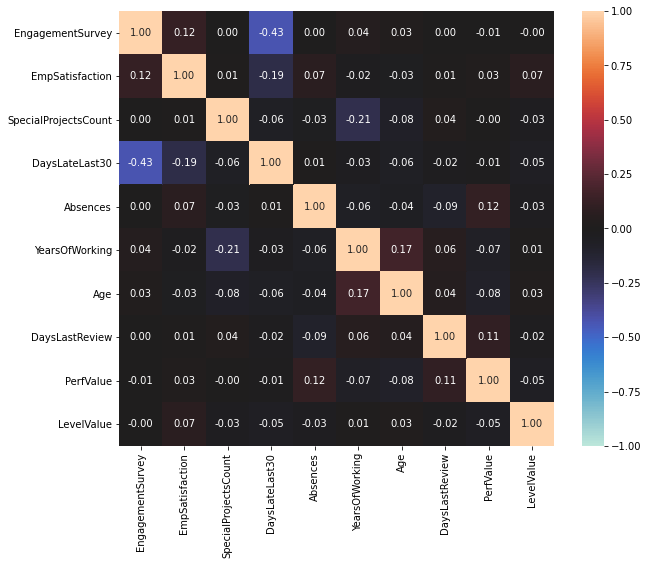

In [41]:
corr_num = associations(dataset=df[numerical_columns2], figsize=(10,8), num_num_assoc='spearman')
plt.show()

- we use spearman method because our data is not normally distributed
- From matrix correlation above, we can see our most of continous feature is not correlated to each other, so our data doenst have multicollinearity, its a good, so we can use all of them.
- theres only 2 features are correlated, Daylatelast30 and EngagementSurvey, they have quite strong negative correlation -0.59. It means that people who have higher Daylatelast30, will have small Engagementsurvey. this is quite make sense, as we know people who are not happy tend to be late.

#### 2.4 Distribution between Numerical Features groupby ActiveStatus

- In this section, we will try to find out whether there is significant difference between 2 group (Yes and No in ActiveStatus).
- To do that we need to do statiscal test, for normal distribution we will use independent T test, and for not normal distribution we will use Wilcoxon Rank-Sum test.
- First we define the hypotesis as below ;
    - H0: Sample distributions are equal.
    - H1: Sample distributions are not equal.

In [42]:
from scipy.stats import ttest_ind, ranksums

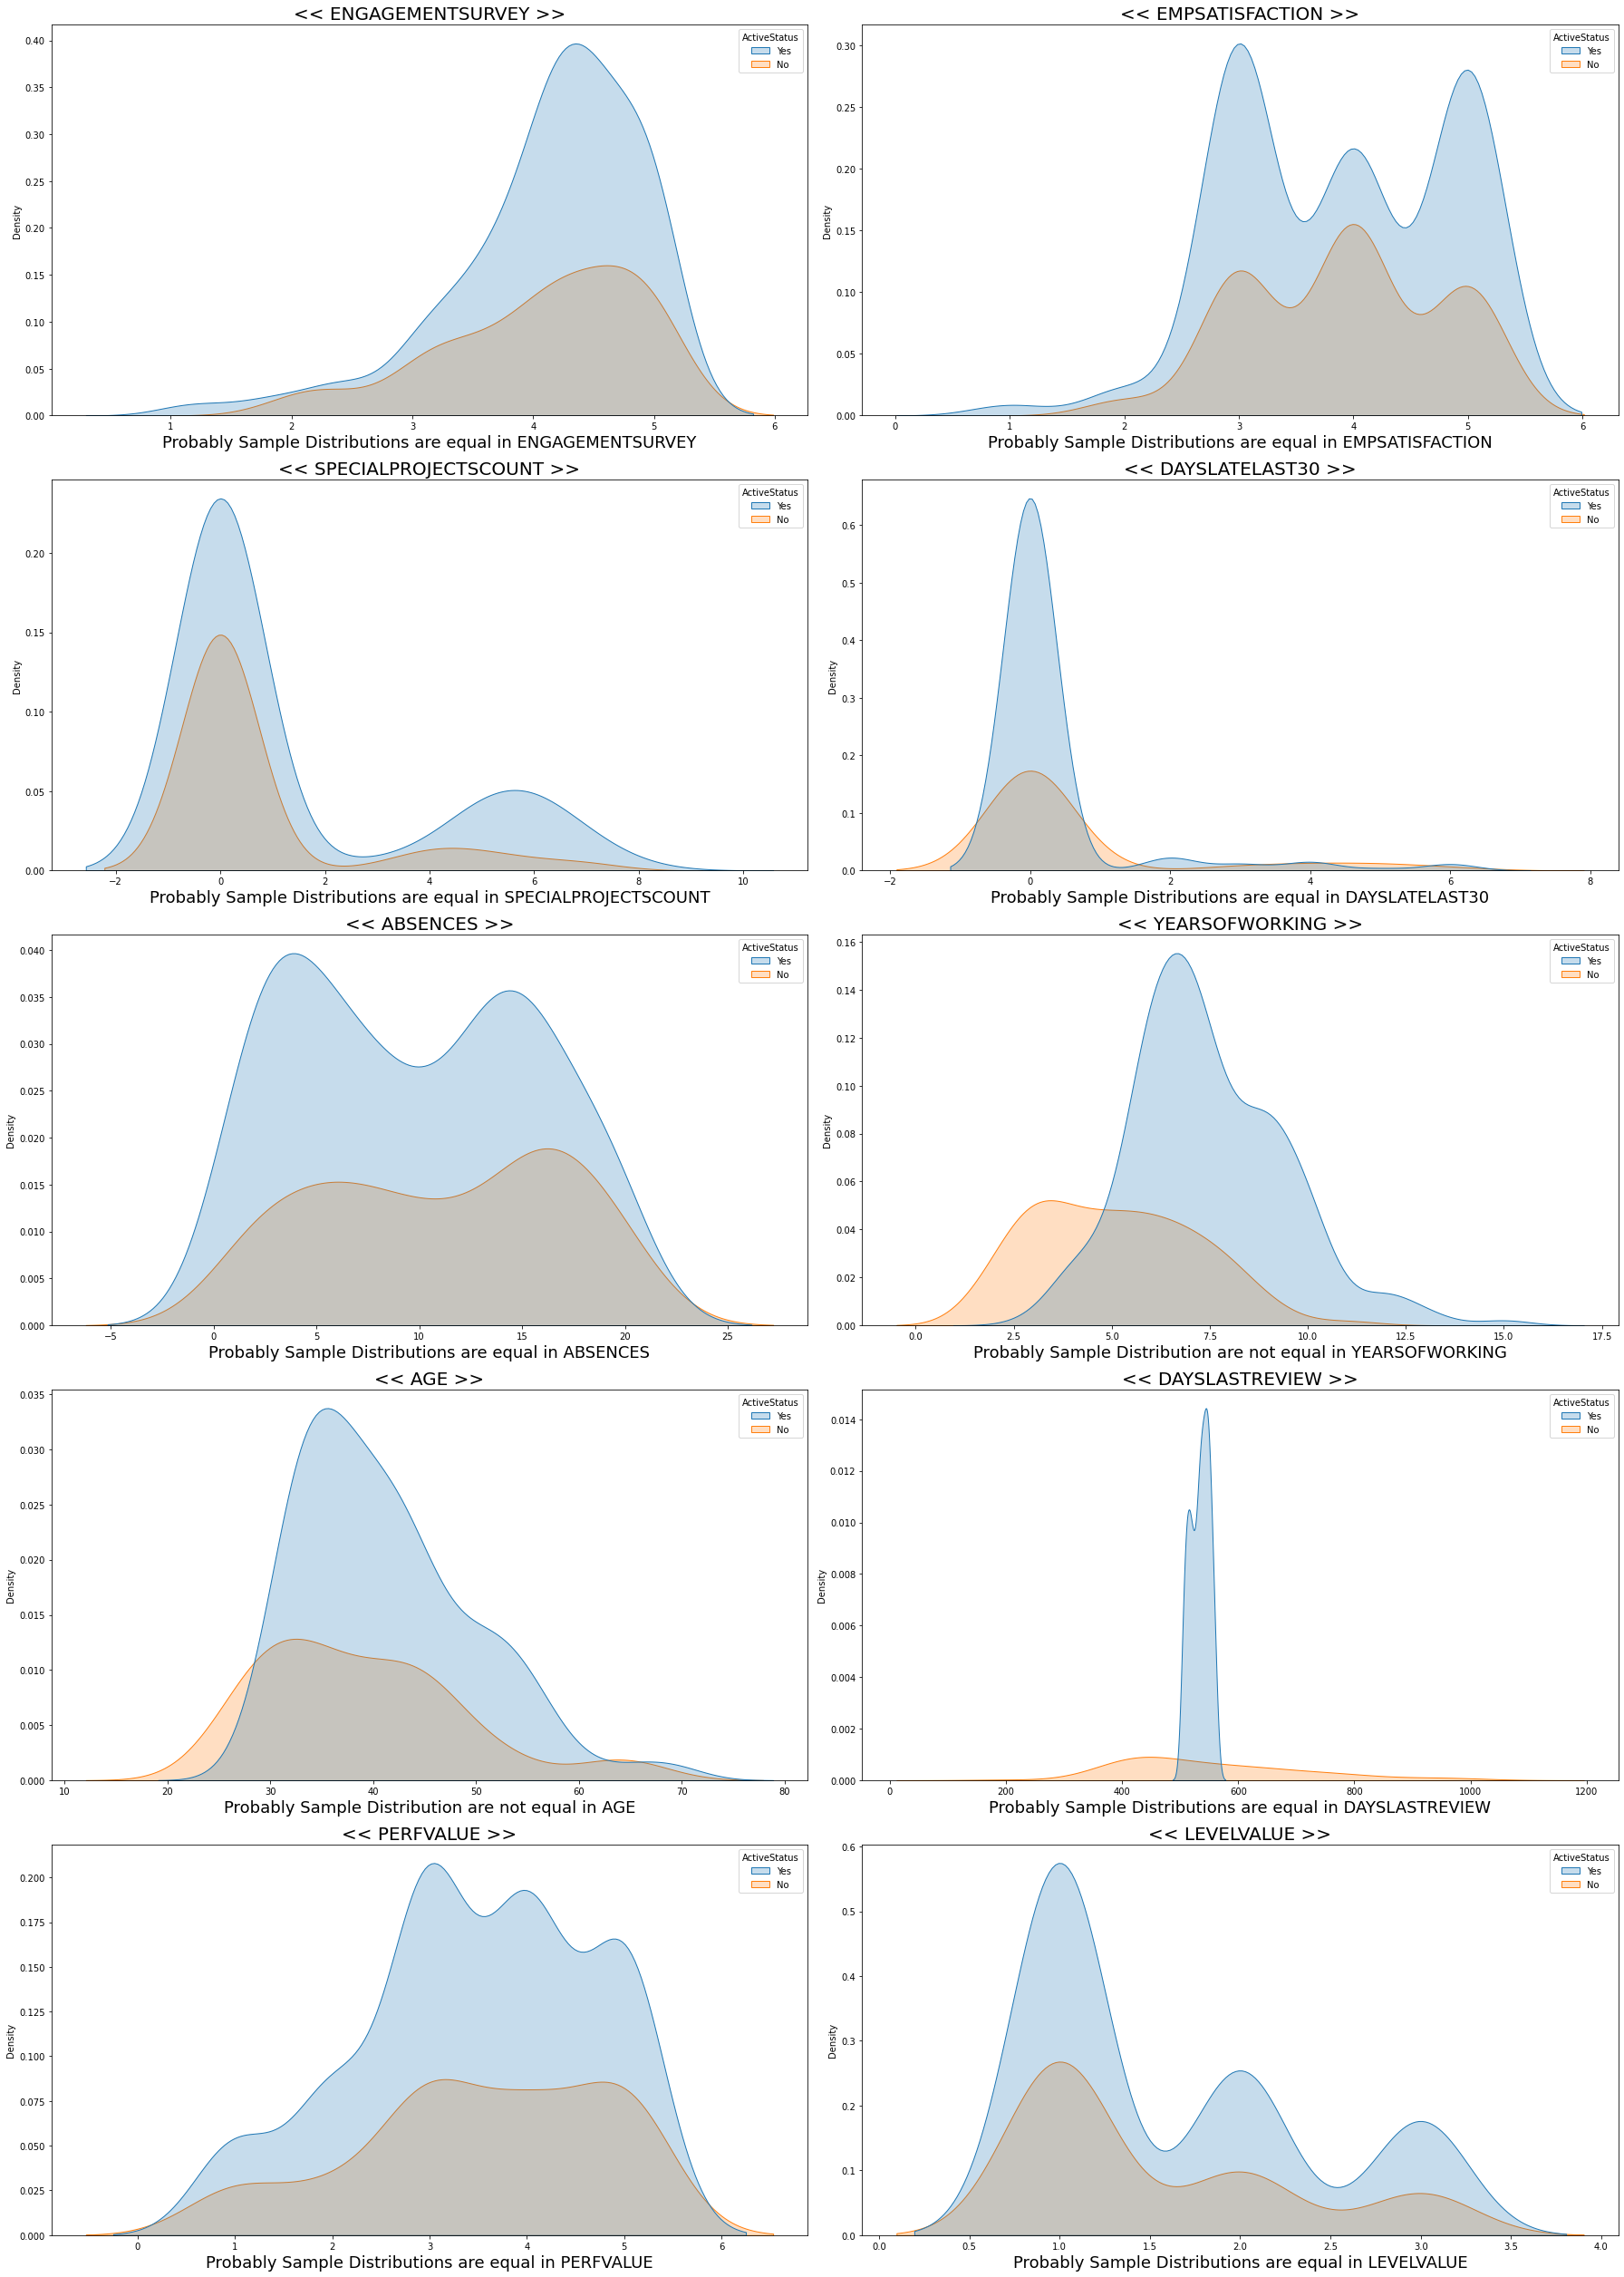

In [43]:
alpha = 0.05
fig, axs = plt.subplots(5, 2, figsize=(25, 35), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()
reject_null_dist = []
accept_null_dist = []

for index, col in enumerate(numerical_columns2):
    kde_plot = sns.kdeplot(data=df, x=col, ax=axs[index], hue='ActiveStatus', fill=True, common_norm= True)
    axs[index].set_title(f'< {col.upper()} >',fontsize=16)
    
    data1 = df[col][df.ActiveStatus == 'Yes']
    data2 = df[col][df.ActiveStatus == 'No']
    
    if col == 'YearsOfWorking':             # normal distribution
        _, pval = ttest_ind(data1, data2)
    else:                                   # not normal distribution
        _, pval = ranksums(data1, data2)
        
    if pval < alpha:
        reject_null_dist.append(col)
        text = f"Probably Sample Distribution are not equal in {col.upper()}"
    else:
        accept_null_dist.append(col)
        text = f"Probably Sample Distributions are equal in {col.upper()}"
        
    axs[index].set_title(f'<< {col.upper()} >>', fontsize=20)
    axs[index].set_xlabel(f"{text}", fontsize=18)

fig.tight_layout()

In [44]:
print('Distribution Group Accepting null Hypotesis : ', accept_null_dist, sep='\n')
print('---------------------------------------------------------------')
print('Distribution Group Rejecting null Hypotesis : ', reject_null_dist, sep='\n')

Distribution Group Accepting null Hypotesis : 
['EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'DaysLastReview', 'PerfValue', 'LevelValue']
---------------------------------------------------------------
Distribution Group Rejecting null Hypotesis : 
['YearsOfWorking', 'Age']


- From the test result, we can infer that, the distribution is not equal in YearsofWoking and Age, it means there is significant difference between Yes and No ActiveStatus in this feature.
- Otherwise, there is no significant difference between Yes and No ActiveStatus in 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'DaysLastReview', 'PerfValue', 'LevelValue'. 

#### 2.5 Correlation between Numerical - Categorical Feature (ActiveStatus)

- In this section we want to see about correlation between continous features and Cateforical variable (ActiveStatus).
- We will use correlation ratio to see this relatioship.

In [45]:
from dython.nominal import correlation_ratio

In [46]:
value_corr = {}

for col in numerical_columns2:
    ratio_corr = correlation_ratio(df['ActiveStatus'], df[col]) 
    value_corr[col] = (round(ratio_corr,2))

corr_rat_results = pd.Series(value_corr)
corr_rat_results.sort_values(inplace=True, ascending=False)

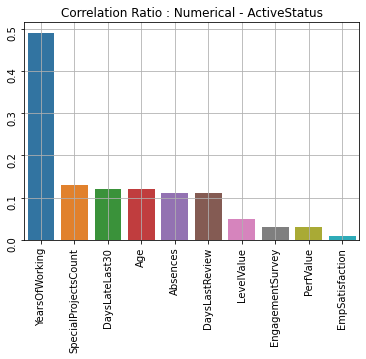

YearsOfWorking          0.49
SpecialProjectsCount    0.13
DaysLateLast30          0.12
Age                     0.12
Absences                0.11
DaysLastReview          0.11
LevelValue              0.05
EngagementSurvey        0.03
PerfValue               0.03
EmpSatisfaction         0.01
dtype: float64

In [47]:
sns.barplot(x =corr_rat_results.index, y = corr_rat_results.values)
plt.title('Correlation Ratio : Numerical - ActiveStatus')
plt.tick_params(labelrotation=90)
plt.grid()
plt.show()
corr_rat_results

- We can see YearsofWorking has the highest correlation ratio with ActiveStatus, with 0.49 we can infer YearsofWorking and ActiveStatus are correlated each other 
- And for the others, the value are small less than 0.15, we can infer they have weak correlation.

#### 2.6 Correlation between Numerical - Categorical Feature (all Feature)

- In this section, we will see all correlation between our feature, to get overall relationship in our data.
- Same as before, we define method to calculate this relationship, for numerical we use spearman and for categorical we use cramerV.

In [48]:
col_analyze = categorical_columns2 + numerical_columns2 + ['ActiveStatus']

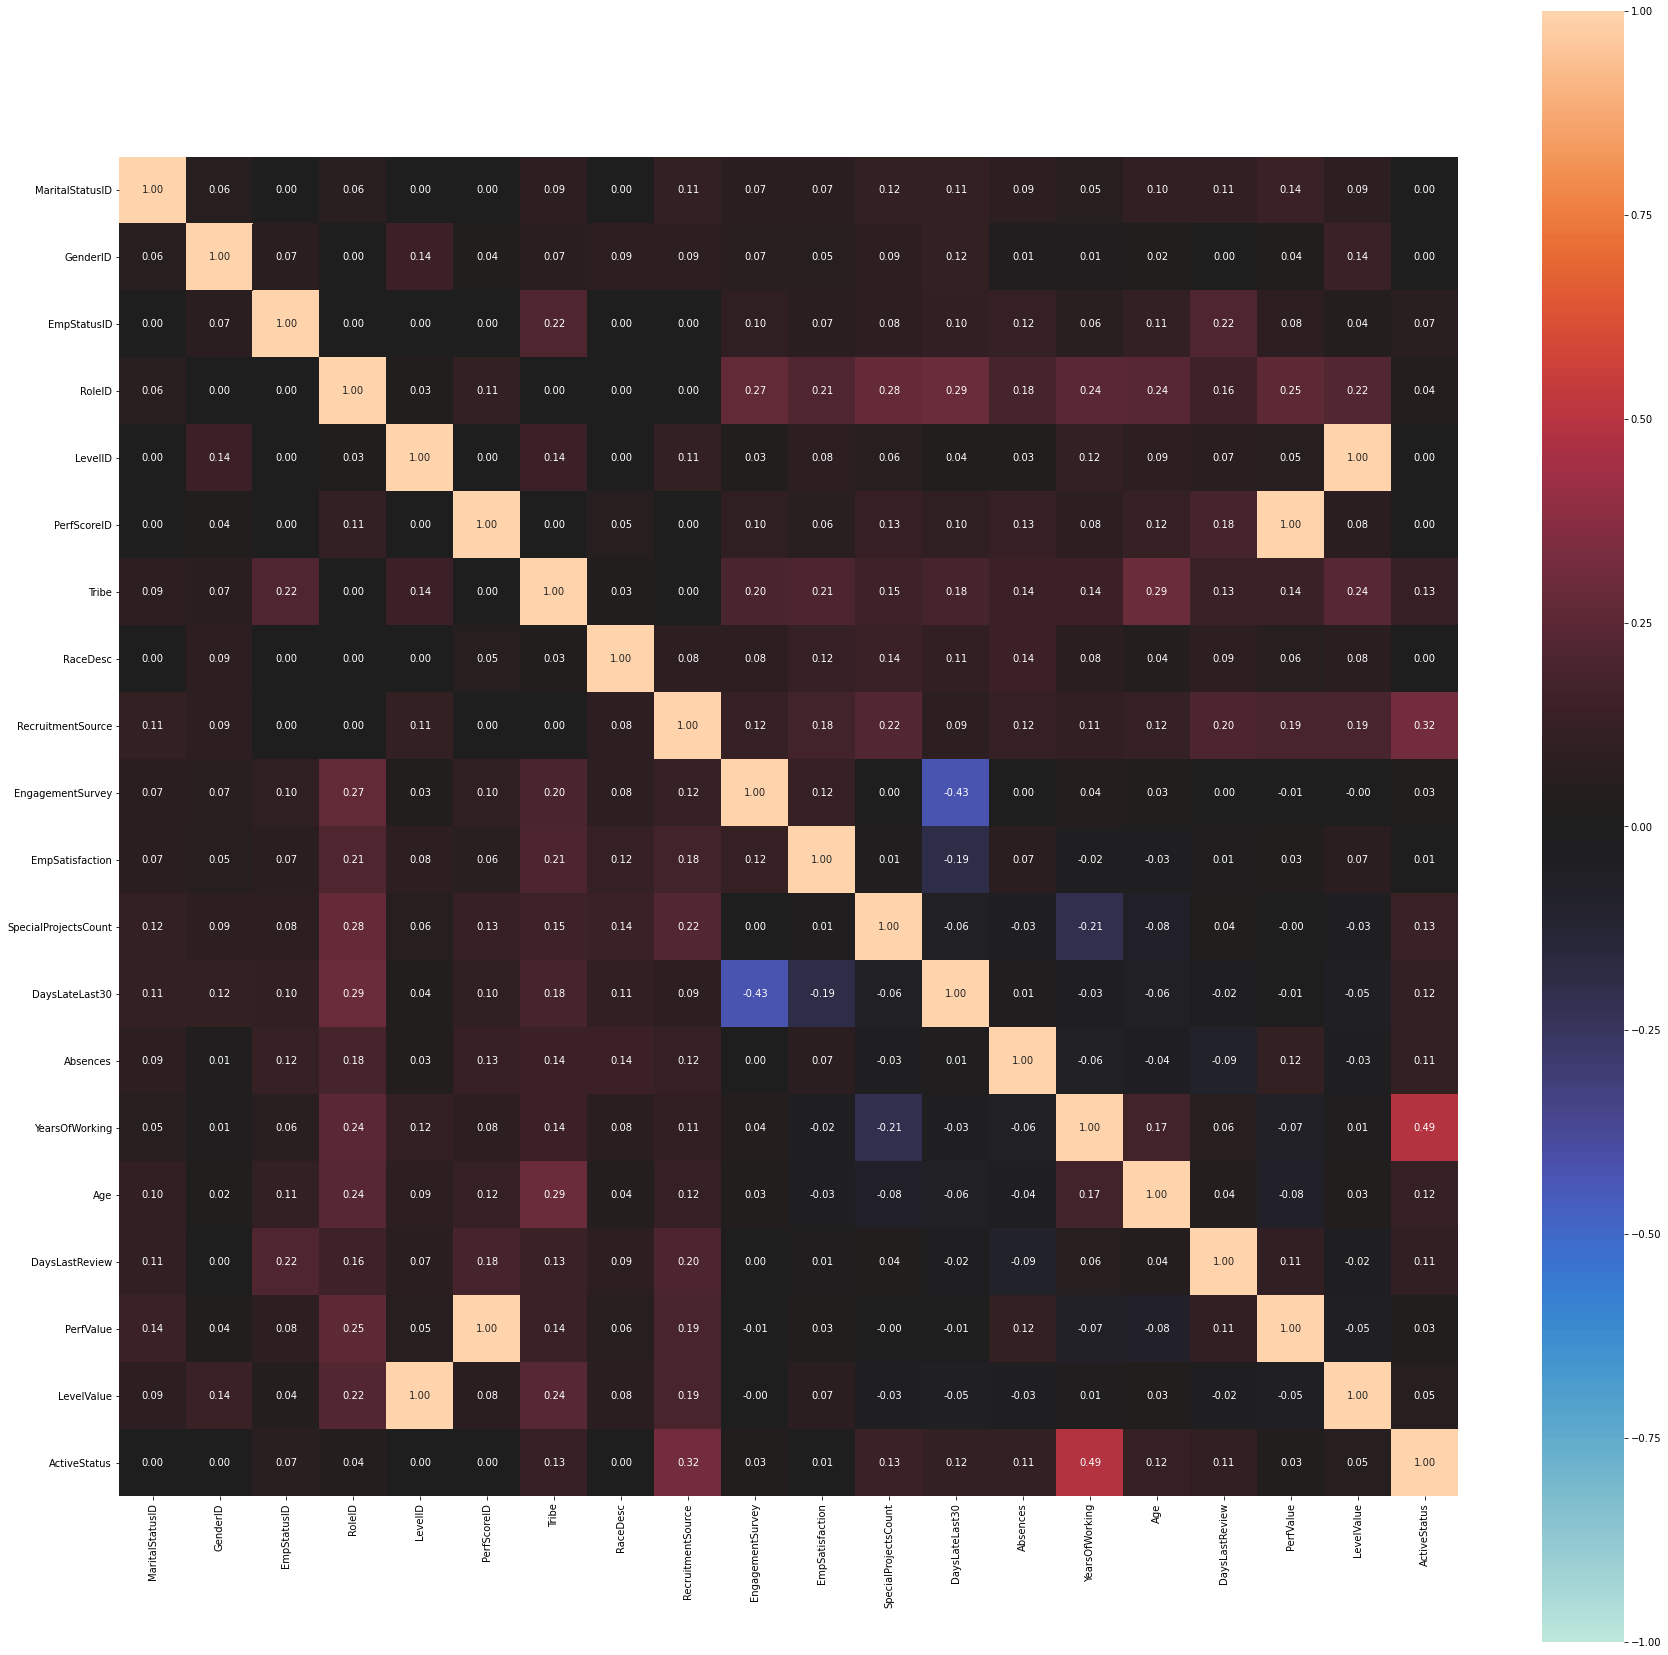

In [49]:
all_corr = associations(dataset=df[col_analyze], numerical_columns= numerical_columns2, 
           nominal_columns = categorical_columns2+['ActiveStatus'], figsize=(30,30), 
           num_num_assoc='spearman', nom_nom_assoc='cramer')
plt.show()

- This matrix actually the same as matrix that we already calculated, its just combination from all feature, to get clearer relationship in our feature.
- The important thing is our data is quite good where there is no multicolinearity between our predictor, PerfValue is the same as Perfscore with, since its just converted. We will use PerfValue then.
- And also with this matrix, we can select features to be used in building machine learning.

In [50]:
# Save data, to be used in Model Building section

df[col_analyze].to_excel('data_clean.xlsx', index=False)

### << END of EDA Section >>